## Data Exploration Notebook
## Author: Priyanka
## Day 2 - Exploratory Data Analysis


In [1]:


import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Import our modules
from src.data.data_loader import DataLoader
from src.data.preprocessor import DataPreprocessor

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print(" All imports successful!")
print(f" Analysis Date: {datetime.now().strftime('%Y-%m-%d')}")


 All imports successful!
 Analysis Date: 2025-10-18


In [2]:
# Initialize our tools
loader = DataLoader()
preprocessor = DataPreprocessor()

# Load Apple stock data
print("Loading AAPL data...")
df_raw = loader.load_data('AAPL', '2020-01-01', '2024-01-01')

# Clean and process
df_clean = preprocessor.clean_data(df_raw)
df = preprocessor.add_basic_features(df_clean)

print(f"\n Loaded {len(df)} days of data")
print(f" Columns: {list(df.columns)}")
df.head()

 DataLoader initialized!
DataPreprocessor initialized!
Loading AAPL data...
 File not found. Downloading...

   From: 2020-01-01
   To: 2024-01-01
 Downloaded 1006 rows
 Saved to: data/raw/AAPL_2020-01-01_2024-01-01.csv

 Cleaning data...
    Sorted data by date
     Found 4 volume outliers (keeping them)
    Final shape: (1006, 8)

 Adding basic features...
    Added daily returns
    Added log returns
    Added price range
    Added price change
    Added up/down indicator
    Added volume change
    Added 5-day moving average
    Added 20-day moving average
    Dropped 19 rows with NaN from rolling calculations

 Loaded 987 days of data
 Columns: ['date', 'open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits', 'returns', 'log_returns', 'price_range', 'price_change', 'is_up_day', 'volume_change', 'ma_5', 'ma_20']


,date,open,high,low,close,volume,dividends,stock splits,returns,log_returns,price_range,price_change,is_up_day,volume_change,ma_5,ma_20
19,2020-01-30 00:00:00-05:00,77.414659,78.272028,76.982348,78.218895,126743200,0.0,0.0,-0.001449,-0.001450,1.289680,0.804236,1,-0.413848,76.953857,75.360957
20,2020-01-31 00:00:00-05:00,77.508856,77.931504,74.456132,74.750778,199588400,0.0,0.0,-0.044339,-0.045352,3.475372,-2.758078,0,0.574746,76.528793,75.471570
21,2020-02-03 00:00:00-05:00,73.492500,75.712008,72.990155,74.545502,173788400,0.0,0.0,-0.002746,-0.002750,2.721852,1.053002,1,-0.129266,76.514787,75.607180
22,2020-02-04 00:00:00-05:00,76.151549,77.197305,75.745808,77.006508,136616400,0.0,0.0,0.033013,0.032480,1.451497,0.854959,1,-0.213892,76.570819,75.837222
23,2020-02-05 00:00:00-05:00,78.134395,78.433877,77.030685,77.634468,118826800,0.0,0.0,0.008155,0.008122,1.403192,-0.499927,0,-0.130216,76.431230,76.115689


In [3]:
print("="*60)
print(" BASIC STATISTICS")
print("="*60)

print("\n1. Dataset Overview:")
print(f"   Shape: {df.shape}")
print(f"   Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"   Trading Days: {len(df)}")

print("\n2. Price Statistics:")
print(df[['open', 'high', 'low', 'close', 'volume']].describe())

print("\n3. Returns Statistics:")
print(df['returns'].describe())

print(f"\n4. Best Day: {df['returns'].max():.2%} on {df.loc[df['returns'].idxmax(), 'date']}")
print(f"   Worst Day: {df['returns'].min():.2%} on {df.loc[df['returns'].idxmin(), 'date']}")


 BASIC STATISTICS

1. Dataset Overview:
   Shape: (987, 16)
   Date Range: 2020-01-30 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
   Trading Days: 987

2. Price Statistics:
             open        high         low       close        volume
count  987.000000  987.000000  987.000000  987.000000  9.870000e+02
mean   139.306922  140.937247  137.784369  139.433909  9.821623e+07
std     32.551397   32.651957   32.452468   32.564783  5.451666e+07
min     55.215094   55.316770   51.470016   54.316952  2.404830e+07
25%    121.835667  123.364429  120.407418  122.128986  6.380945e+07
50%    143.272882  145.182498  142.234085  143.507950  8.347720e+07
75%    164.308915  166.199846  162.776983  164.196037  1.143590e+08
max    196.357582  197.944141  195.346155  196.446823  4.265100e+08

3. Returns Statistics:
count    987.000000
mean       0.001128
std        0.021246
min       -0.128647
25%       -0.009183
50%        0.000765
75%        0.012721
max        0.119808
Name: returns, dtype: float64



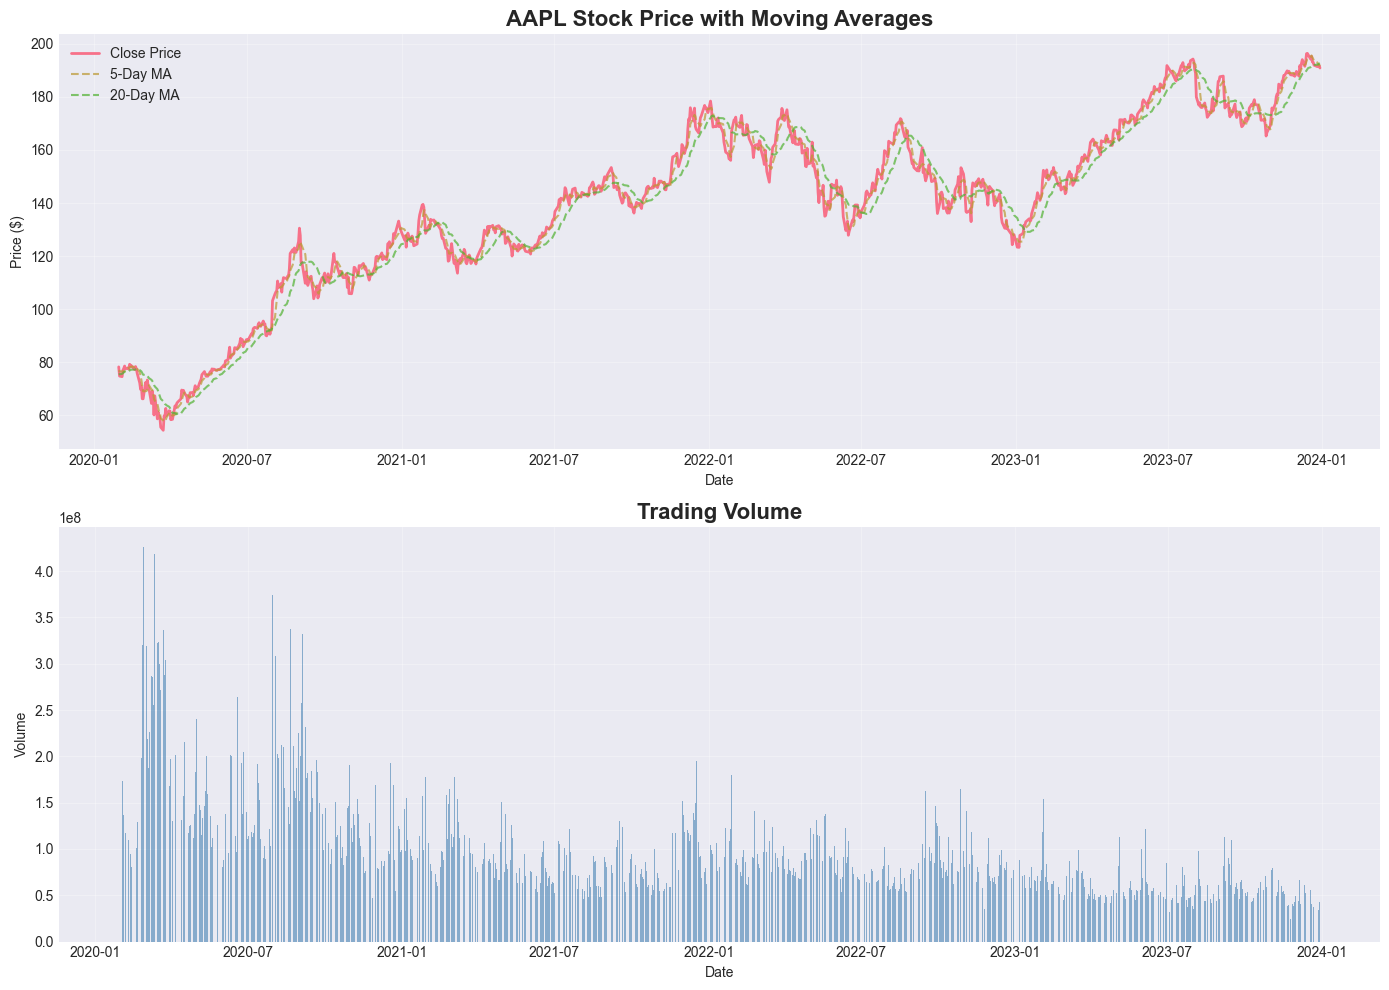

 Plot saved to results/figures/price_history.png


In [4]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Price with Moving Averages
axes[0].plot(df['date'], df['close'], label='Close Price', linewidth=2)
axes[0].plot(df['date'], df['ma_5'], label='5-Day MA', alpha=0.7, linestyle='--')
axes[0].plot(df['date'], df['ma_20'], label='20-Day MA', alpha=0.7, linestyle='--')
axes[0].set_title('AAPL Stock Price with Moving Averages', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Volume
axes[1].bar(df['date'], df['volume'], alpha=0.6, color='steelblue')
axes[1].set_title('Trading Volume', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Volume')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/price_history.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Plot saved to results/figures/price_history.png")


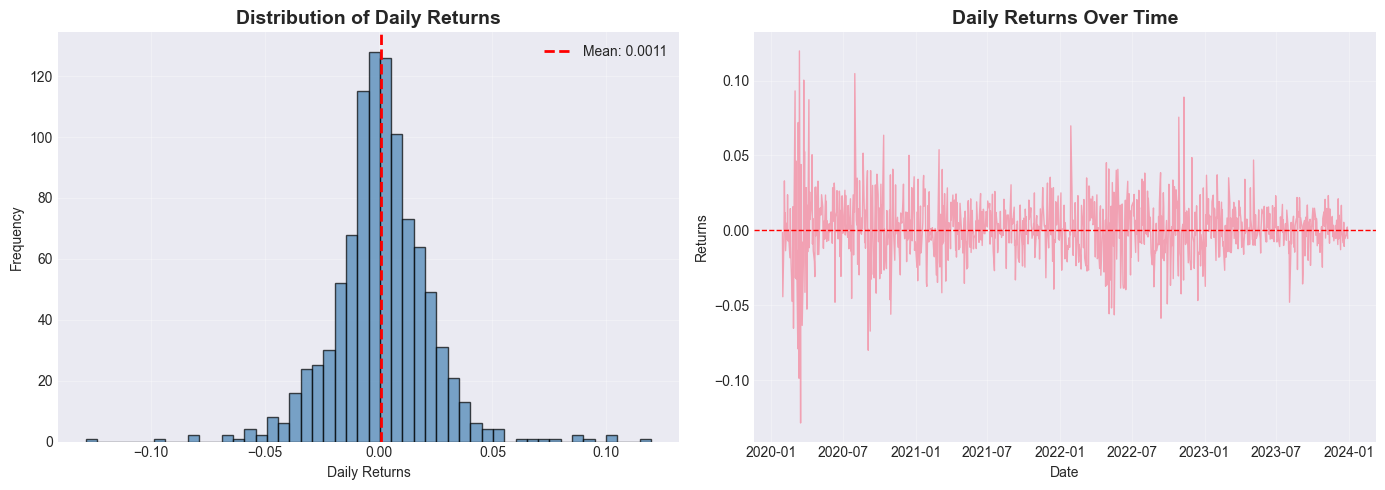

 Plot saved to results/figures/returns_analysis.png


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Returns Histogram
axes[0].hist(df['returns'].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].axvline(df['returns'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['returns'].mean():.4f}")
axes[0].set_title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Daily Returns')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Returns Over Time
axes[1].plot(df['date'], df['returns'], alpha=0.6, linewidth=1)
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Daily Returns Over Time', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Returns')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/returns_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Plot saved to results/figures/returns_analysis.png")


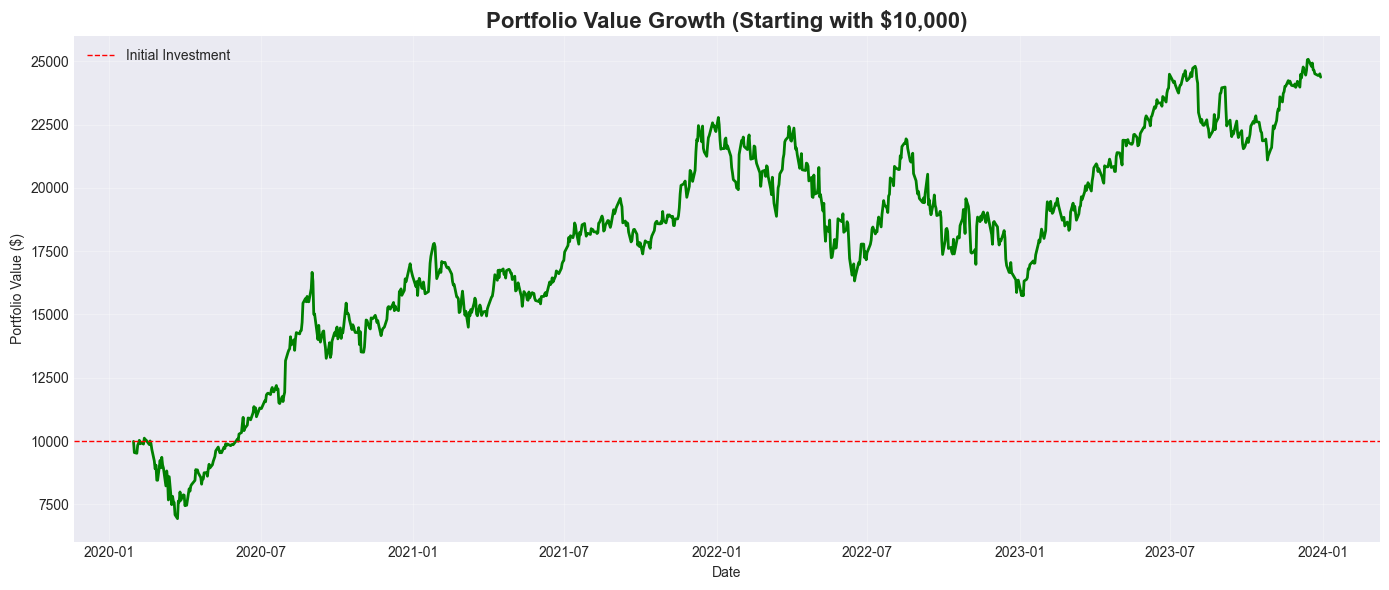

 Initial Investment: $10,000.00
 Final Value: $24,372.24
 Total Return: 143.72%
 Plot saved to results/figures/cumulative_returns.png


In [6]:
# Calculate cumulative returns
df['cumulative_returns'] = (1 + df['returns']).cumprod()

# Initial investment value
initial_investment = 10000
df['portfolio_value'] = initial_investment * df['cumulative_returns']

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['portfolio_value'], linewidth=2, color='green')
plt.axhline(initial_investment, color='red', linestyle='--', linewidth=1, label='Initial Investment')
plt.title(f'Portfolio Value Growth (Starting with ${initial_investment:,})', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figures/cumulative_returns.png', dpi=300, bbox_inches='tight')
plt.show()

final_value = df['portfolio_value'].iloc[-1]
total_return = (final_value - initial_investment) / initial_investment
print(f" Initial Investment: ${initial_investment:,.2f}")
print(f" Final Value: ${final_value:,.2f}")
print(f" Total Return: {total_return:.2%}")
print(" Plot saved to results/figures/cumulative_returns.png")


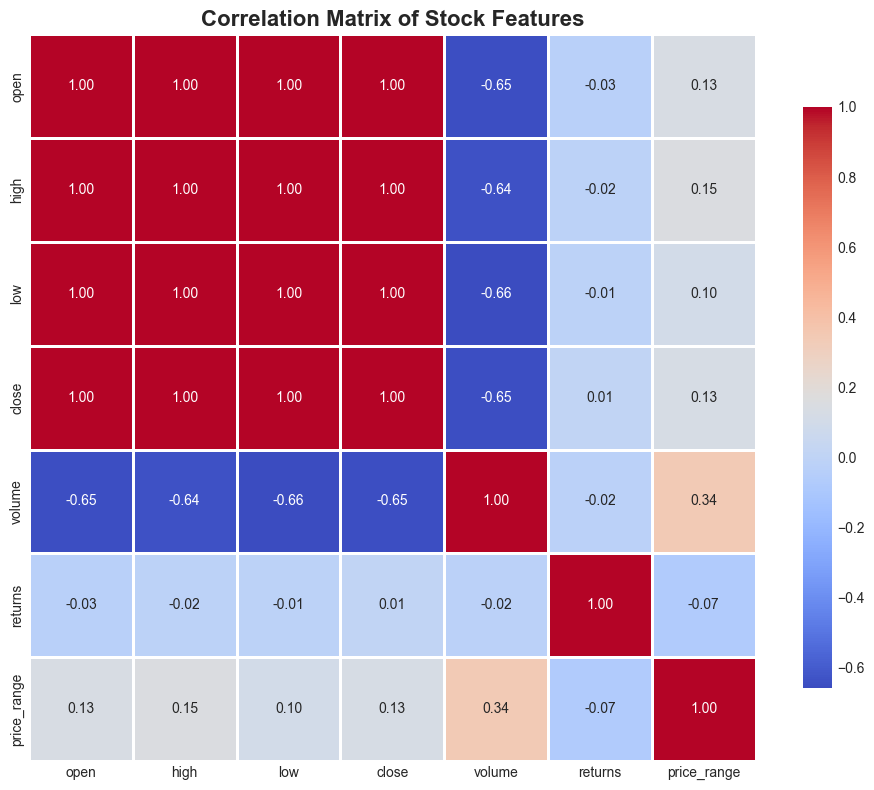

 Plot saved to results/figures/correlation_matrix.png


In [7]:
# Select numeric columns for correlation
corr_cols = ['open', 'high', 'low', 'close', 'volume', 'returns', 'price_range']
correlation_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Stock Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Plot saved to results/figures/correlation_matrix.png")


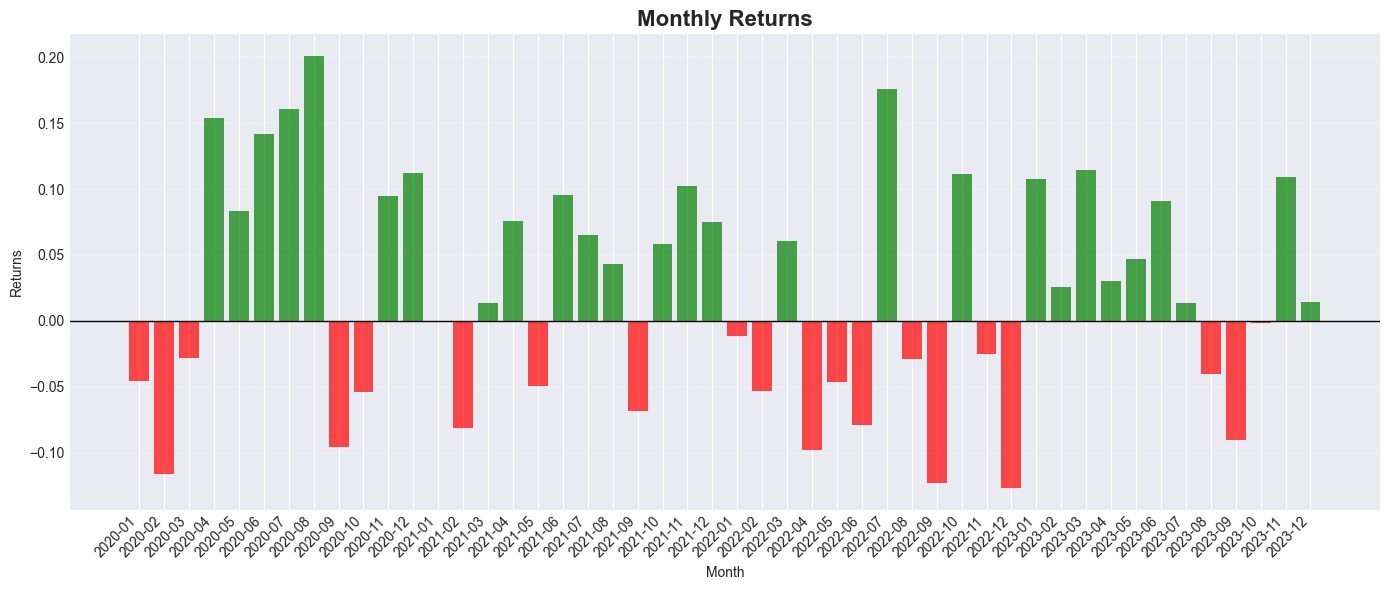

 Plot saved to results/figures/monthly_returns.png


In [8]:
# Extract month and year
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calculate monthly returns
monthly_returns = df.groupby(['year', 'month'])['returns'].sum().reset_index()
monthly_returns['year_month'] = monthly_returns['year'].astype(str) + '-' + monthly_returns['month'].astype(str).str.zfill(2)

# Plot
plt.figure(figsize=(14, 6))
colors = ['green' if x > 0 else 'red' for x in monthly_returns['returns']]
plt.bar(range(len(monthly_returns)), monthly_returns['returns'], color=colors, alpha=0.7)
plt.axhline(0, color='black', linewidth=1)
plt.title('Monthly Returns', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Returns')
plt.xticks(range(len(monthly_returns)), monthly_returns['year_month'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../results/figures/monthly_returns.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Plot saved to results/figures/monthly_returns.png")


In [11]:
# Create the directory if it doesn't exist
import os
os.makedirs('data/processed', exist_ok=True)
print(" Created data/processed directory")

output_file = 'data/processed/AAPL_processed_with_features.csv'
df.to_csv(output_file, index=False)

print("="*60)
print(" DAY 2 EXPLORATION COMPLETE!")
print("="*60)
print(f"Processed {len(df)} rows of data")
print(f" Saved to: {output_file}")

 Created data/processed directory
 DAY 2 EXPLORATION COMPLETE!
Processed 987 rows of data
 Saved to: data/processed/AAPL_processed_with_features.csv
